In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("C:/Users/R Zal/Desktop/Data analysis/Kaggle/EDA/archive/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Renaming the columns

df.rename(columns={'race/ethnicity':'race','parental level of education':'parent_education', 
                    'test preparation course':'preparation_course'}, inplace=True)

In [9]:
df.head(2)

,gender,race,parent_education,lunch,preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [10]:
# Looking for null values

df.isnull().sum()

gender                0
race                  0
parent_education      0
lunch                 0
preparation_course    0
math score            0
reading score         0
writing score         0
dtype: int64

In [11]:
# Search for duplicates

duplicates = df.duplicated()

In [12]:
df[duplicates]

,gender,race,parent_education,lunch,preparation_course,math score,reading score,writing score


## There are no duplicates or null values in the database

In [13]:
# Check that all data is in the correct format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race                1000 non-null   object
 2   parent_education    1000 non-null   object
 3   lunch               1000 non-null   object
 4   preparation_course  1000 non-null   object
 5   math score          1000 non-null   int64 
 6   reading score       1000 non-null   int64 
 7   writing score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Understanding the data

In [14]:
df.describe(include=['O'])

,gender,race,parent_education,lunch,preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [15]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


## How are the results distributed depending on whether or not the student finished the preparation course?

<Figure size 864x576 with 0 Axes>

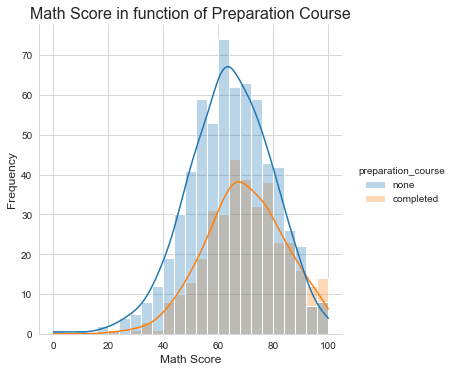

In [33]:
plt.figure(figsize=(12, 8))

sns.displot(data=df, x="math score", hue="preparation_course", kde=True, alpha=0.3)

plt.title('Math Score in function of Preparation Course', size=16)
plt.xlabel('Math Score', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

### Apparently, in the mathematics exam, the factor of finishing the preparation course or not did not have a difference in the results of the students.

<Figure size 720x432 with 0 Axes>

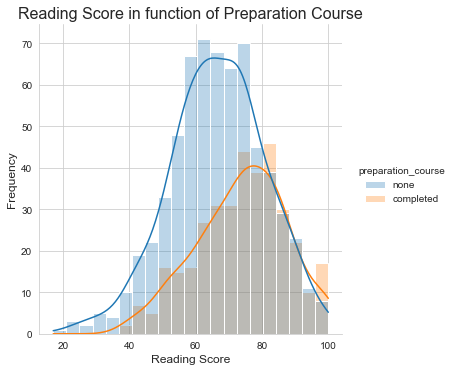

In [34]:
plt.figure(figsize=(10, 6))

sns.displot(data=df, x="reading score", hue="preparation_course", kde=True, alpha=0.3)

plt.title('Reading Score in function of Preparation Course', size=16)
plt.xlabel('Reading Score', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

### In the case of the reading exam, it can be seen that the students who finished the preparation course achieved higher grades than those who did not finish it.

<Figure size 720x432 with 0 Axes>

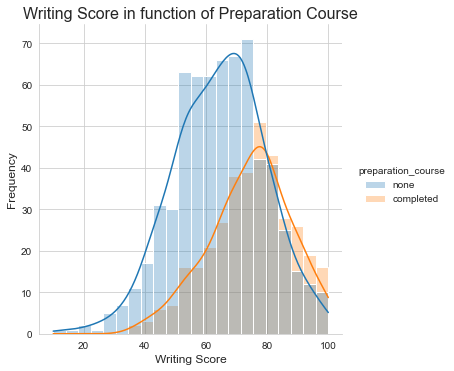

In [35]:
plt.figure(figsize=(10, 6))

sns.displot(data=df, x="writing score", hue="preparation_course", kde=True, alpha=0.3)

plt.title('Writing Score in function of Preparation Course', size=16)
plt.xlabel('Writing Score', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

### Finally, it can be observed that the marks obtained in the writing exam by those students who completed the preparation course were higher.

## Let's investigate the differences are statistically significant.
#### (in mathematics because apparently according to the graph this difference is non-existent.)

In [21]:
completed = df[df['preparation_course'] == 'completed']
not_completed = df[df['preparation_course'] == 'none']

In [23]:
t_statistic, p_value = stats.ttest_ind(completed['math score'], not_completed['math score'])

print('Estadistica t:', t_statistic)
print('Valor p:', p_value)

Estadistica t: 5.704616417349102
Valor p: 1.5359134607147415e-08


### The positive value of the t statistic indicates that the mean of the group that completed the preparation course is greater than the mean of the group that did not complete the course. (The higher this value, the greater the difference between means)

### The p-value is the probability of obtaining the observed results if the null hypothesis is true. The low p value indicates that the observed difference is very unlikely to occur under the null hypothesis, which leads to rejecting the null hypothesis and leads to the conclusion that there is a significant difference between the means of the two groups, contrary to what we first assumed.

# But, is there any difference between the performance of students based on gender?

<Figure size 576x576 with 0 Axes>

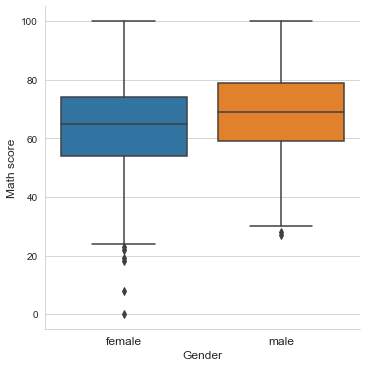

In [40]:
plt.figure(figsize=(8,8))

sns.catplot(data=df, x='gender', y='math score', kind="box")
plt.xlabel('Gender', size=12)
plt.ylabel('Math score', size=12)
plt.xticks(size=12)

plt.show()

<Figure size 576x576 with 0 Axes>

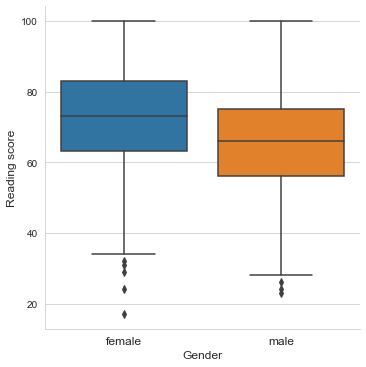

In [41]:
plt.figure(figsize=(8,8))

sns.catplot(data=df, x='gender', y='reading score', kind="box")
plt.xlabel('Gender', size=12)
plt.ylabel('Reading score', size=12)
plt.xticks(size=12)

plt.show()

<Figure size 576x576 with 0 Axes>

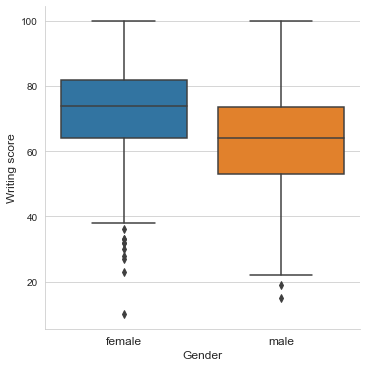

In [42]:
plt.figure(figsize=(8,8))

sns.catplot(data=df, x='gender', y='writing score', kind="box")
plt.xlabel('Gender', size=12)
plt.ylabel('Writing score', size=12)
plt.xticks(size=12)

plt.show()

In [28]:
group_female = df[df['gender'] == 'female']
group_male = df[df['gender'] == 'male']

In [29]:
mean_female = group_female[['math score', 'reading score', 'writing score']].mean()
mean_male = group_male[['math score', 'reading score', 'writing score']].mean()

print("Promedio (media) de puntajes para el grupo femenino:")
print(mean_female)
print("\nPromedio (media) de puntajes para el grupo masculino:")
print(mean_male)

Promedio (media) de puntajes para el grupo femenino:
math score       63.633205
reading score    72.608108
writing score    72.467181
dtype: float64

Promedio (media) de puntajes para el grupo masculino:
math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64


### Apparently, in mathematics, boys obtained higher scores on average, while in reading and writing the opposite was the case.

In [30]:
group_female = df[df['gender'] == 'female']
group_male = df[df['gender'] == 'male']

# t-Student para cada variable

t_statistic, p_value = stats.ttest_ind(group_female['math score'], group_male['math score'])
print("math score - T-statistic:", t_statistic)
print("math score - p-value:", p_value)

t_statistic, p_value = stats.ttest_ind(group_female['reading score'], group_male['reading score'])
print("reading score - T-statistic:", t_statistic)
print("reading score - p-value:", p_value)

t_statistic, p_value = stats.ttest_ind(group_female['writing score'], group_male['writing score'])
print("writing score - T-statistic:", t_statistic)
print("writing score - p-value:", p_value)

math score - T-statistic: -5.383245869828983
math score - p-value: 9.120185549328822e-08
reading score - T-statistic: 7.959308005187657
reading score - p-value: 4.680538743933289e-15
writing score - T-statistic: 9.979557910004507
writing score - p-value: 2.019877706867934e-22


## In summary, according to the results, significant differences were found in the average scores between men and women in the three subjects. Men scored higher in math, while women scored higher in reading and writing.